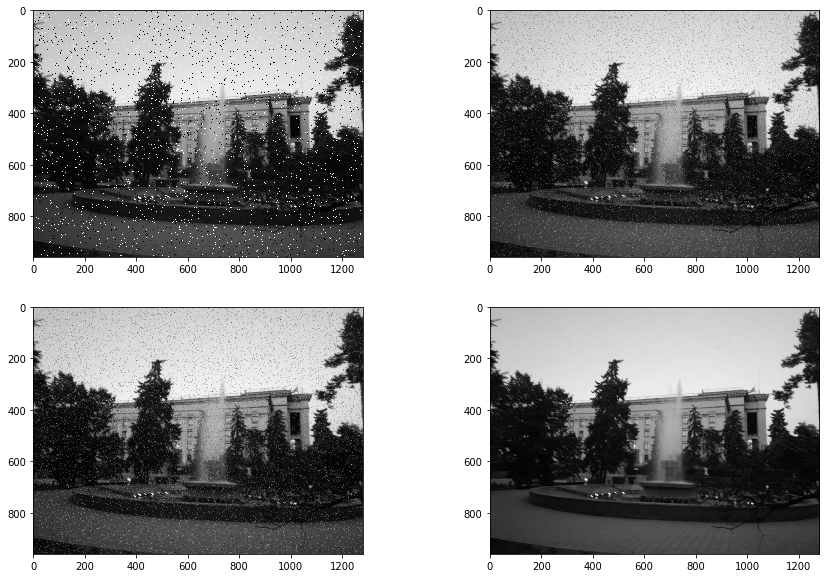

In [63]:
import matplotlib.pyplot as plt
#import matplotlib.image as img
import numpy as np
import scipy.misc as img
from scipy import ndimage
import random
%matplotlib inline

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


image = img.imread('./photo_3.jpg' ,mode ='F')

image = sp_noise(image, 0.02)

a = np.array([[1/16.0,2/16.0,1/16.0],[2/16.0,4/16.0,2/16.0],[1/16.0,2/16.0,1/16.0]])
#a - poorly removes noise such as "salt and pepper"
b = np.array([[0,1/5.0,0],[1/5.0,1/5.0,1/5.0],[0,1/5.0,0]])
#b - poorly removes noise such as "salt and pepper"
flta = ndimage.convolve(image, a, mode='nearest', cval=0.0)

fltb = ndimage.convolve(image, b, mode='nearest', cval=0.0)
#c - works slower than the other specified noise-canceling filters
fltc = ndimage.median_filter(image, 3)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(image,cmap='gray')
plt.subplot(222)
plt.imshow(flta,cmap='gray')

plt.subplot(223)
plt.imshow(fltb,cmap='gray')

plt.subplot(224)
plt.imshow(fltc,cmap='gray')

plt.show()

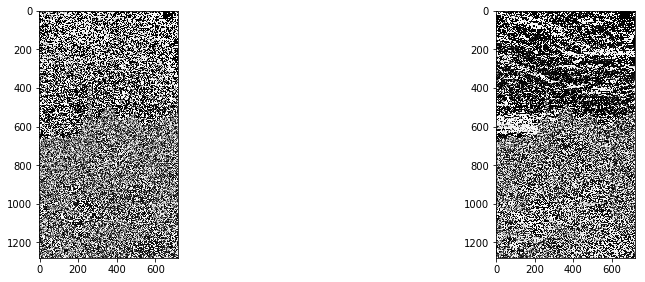

In [62]:

d = np.array([[-1,-2,-1],[-2,12,-2],[-1,-2,-1]])

#d - will destroy all lines of one pixel thickness in the image
fig = plt.figure(figsize=(15,10))
fltd = ndimage.convolve(image, d, mode='nearest', cval=0.0)
plt.subplot(221)
plt.imshow(fltd,cmap='gray')

e = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
#e - will destroy all lines of one pixel thickness in the image
flte = ndimage.convolve(image, e, mode='nearest', cval=0.0)
plt.subplot(222)
plt.imshow(flte,cmap='gray')


plt.show()
